# MONDRIAN FOREST: APPLICATION TO 3D BLOBS DATASET

In [1]:
cd  "C:\Users\silvi\Desktop\Fisica\TESI\tesi"

C:\Users\silvi\Desktop\Fisica\TESI\tesi


In [2]:
from sklearn import datasets
import pandas as pd
import pylab as plt
%matplotlib notebook
import numpy as np

import Mondrian
import Plot

## Blobs dataset:

In [3]:
blobs = datasets.make_blobs(n_samples=30,n_features=3,cluster_std=[1.0, 2, 0.5],random_state=50)
X = blobs[0]
y = blobs[1]

In [4]:
df_blobs = {'X1':X[:,0],'X2':X[:,1],'X3':X[:,2],'y':y}
df_blobs = pd.DataFrame(df_blobs)
df_blobs.head()

,X1,X2,X3,y
0,-0.422263,-4.695727,11.725109,1
1,-3.748338,-3.718688,14.523919,1
2,0.647538,-5.505340,-3.212045,0
3,0.205082,-4.633204,-5.021534,0
4,0.221164,-4.706445,-4.728126,0


<IPython.core.display.Javascript object>


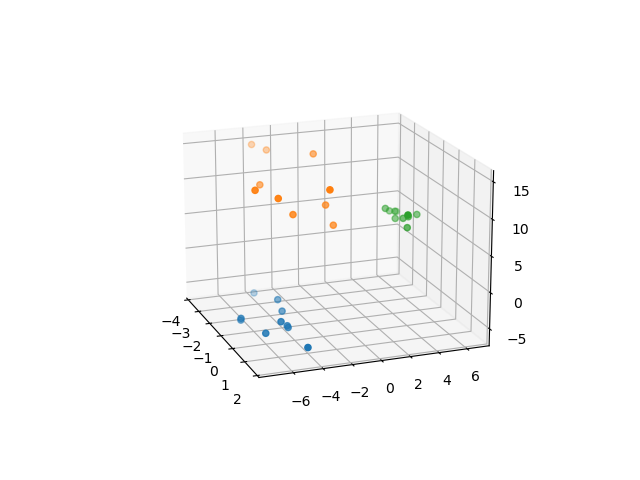

In [5]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(df_blobs.query('y==0')['X1'],df_blobs.query('y==0')['X2'],df_blobs.query('y==0')['X3'])
ax.scatter(df_blobs.query('y==1')['X1'],df_blobs.query('y==1')['X2'],df_blobs.query('y==1')['X3'])
ax.scatter(df_blobs.query('y==2')['X1'],df_blobs.query('y==2')['X2'],df_blobs.query('y==2')['X3'])

In [6]:
import Matrix
data,cut_matrix,distance_matrix = Matrix.cut_ensemble(X)

In [7]:
data[0:5]

array([[-0.42226, -4.69573, 11.72511,  0.     ],
       [-3.74834, -3.71869, 14.52392,  1.     ],
       [ 0.64754, -5.50534, -3.21205,  2.     ],
       [ 0.20508, -4.6332 , -5.02153,  3.     ],
       [ 0.22116, -4.70644, -4.72813,  4.     ]])

In [8]:
print('number of hyperplanes: ',len(cut_matrix))
print('number of hyperplane families: ',len(np.unique(cut_matrix[:,3])))
cut_matrix[0:5]

number of hyperplanes:  435
number of hyperplane families:  98


array([[ 1.     ,  0.     ,  0.     ,  0.     ,  8.8787 , -0.74652,
         0.21929,  0.62818],
       [ 2.     ,  0.     ,  1.     ,  1.     , -3.95608,  0.07133,
        -0.05398, -0.99599],
       [ 2.     ,  1.     ,  2.     ,  2.     , -5.38617,  0.23943,
        -0.09731, -0.96602],
       [ 3.     ,  0.     ,  3.     ,  1.     , -3.37088,  0.03743,
         0.00373, -0.99929],
       [ 3.     ,  1.     ,  4.     ,  3.     , -4.81155,  0.19804,
        -0.04581, -0.97912]])

In [9]:
print('number of rows = number of samples = ',len(distance_matrix))
print('number of columns = number of hyperplanes + 1 = ',len(distance_matrix[0]))
distance_matrix

number of rows = number of samples =  30
number of columns = number of hyperplanes + 1 =  436


array([[ -2.22771,  -7.49864,  -5.58471, ...,  -3.08263,   8.82149,
          0.     ],
       [  2.22771, -10.57623,  -9.17987, ...,  -5.33331,   8.03427,
          1.     ],
       [-12.58713,   7.49864,   9.17987, ...,   7.39143,   6.21583,
          2.     ],
       ...,
       [ -1.26026,  -6.99921,  -5.41152, ...,  -2.9356 ,   8.17114,
         27.     ],
       [ -2.89169,  -1.58659,  -0.59428, ...,   8.58902,  -3.77625,
         28.     ],
       [ -4.22613,  -2.89878,  -1.34232, ...,   2.9356 ,   3.77625,
         29.     ]])

## MONDRIAN CLUSTERING FOREST

In [10]:
# parameter setting
t0 = 0
lifetime = 5
exp = 5
metric = 'min_corr'  # 'variance','centroid_diff','centroid_ratio','min'

In [11]:
# the forest consists of 3 trees
number_of_iterations = 3
data,part_space_list,part_data_list,merg_space_list,merg_data_list,ami_mean,ami_std,ami_tot = Mondrian.mondrian_forest(X,t0,lifetime,exp,metric,number_of_iterations)

Tree number 1
PARTITIONING:
total number of splits: 17
MERGING:
range of possible number of clusters: 1-13
Tree number 2
PARTITIONING:
total number of splits: 18
MERGING:
range of possible number of clusters: 1-12
Tree number 3
PARTITIONING:
total number of splits: 18
MERGING:
range of possible number of clusters: 1-12


The objects given as output of each tree are stored as elements of *part_space_list*, *part_data_list*, *merg_space_list*, *merg_data_list* (each index refers to a tree). *ami_tot* is a list of lists storing the adjusted mutual information computed for each pair of tree outcome and for each possible division into clusters (each element of the list corresponds to a specific pair of trees). *ami_mean* and *ami_std* are lists storing the ami averaged values and standard deviations (one value for each possible division).

### DETERMINATION OF THE NUMBER OF CLUSTERS

Plot of the averaged AMI coefficient vs the number of clusters.

<IPython.core.display.Javascript object>


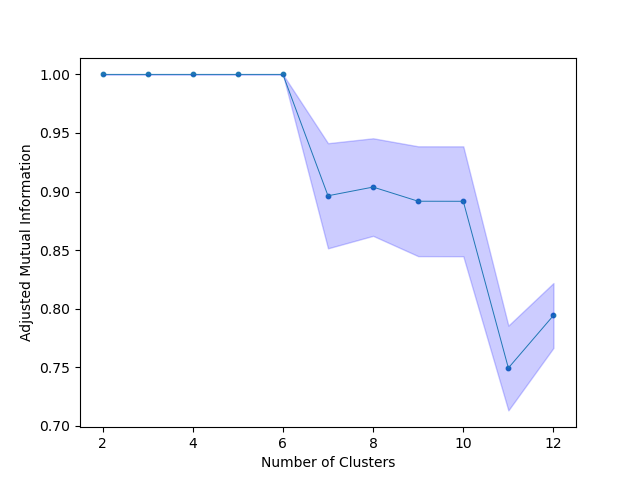

In [12]:
Plot.plot_AMI(ami_mean,ami_std)

### PLOT OF SINGLE TREE RESULTS

#### DATA CLASSIFICATION PLOT

<IPython.core.display.Javascript object>


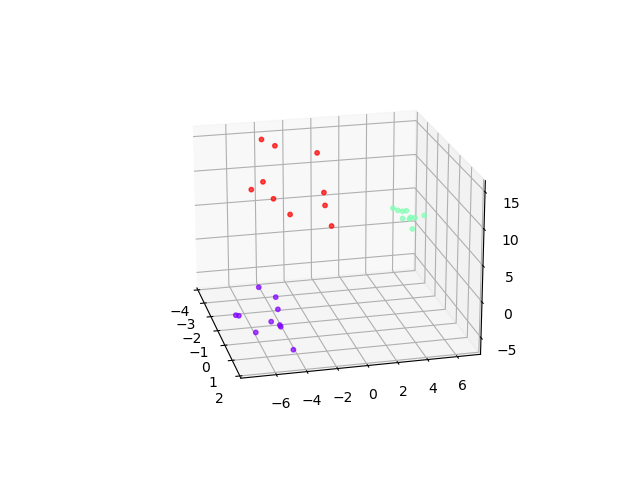

<IPython.core.display.Javascript object>


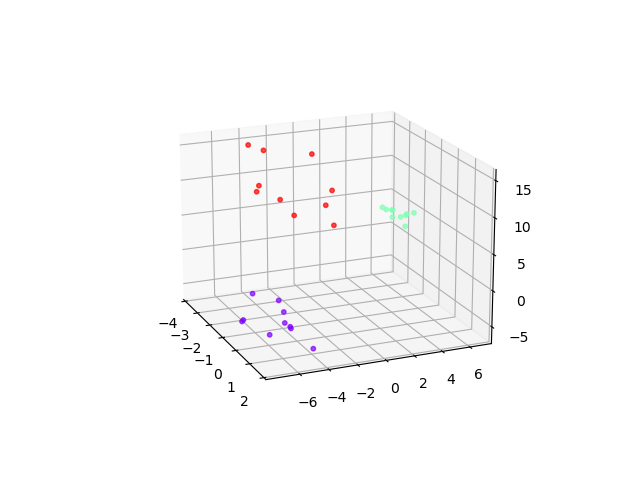

<IPython.core.display.Javascript object>


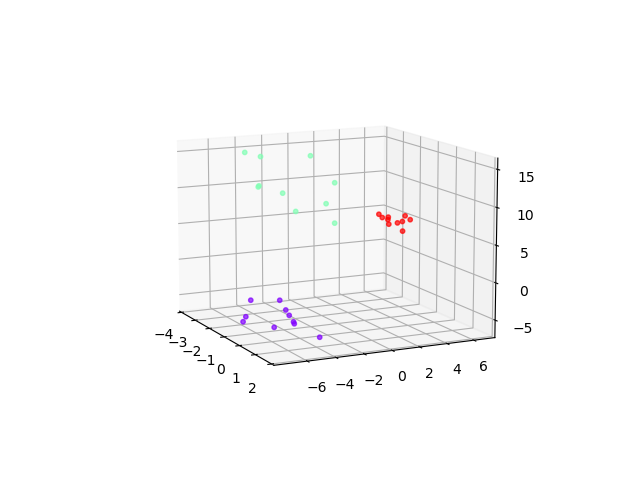

In [13]:
number_of_clusters = 3
for k in range(number_of_iterations):
    part_space = part_space_list[k]
    merg_space = merg_space_list[k]
    merg_data = merg_data_list[k]
    Plot.plot3D(data,part_space,merg_space,merg_data,number_of_clusters,True,False)

#### SPACE CLASSIFICATION PLOT

In [14]:
# select a specific tree output 
k = 0
part_space = part_space_list[k]
merg_space = merg_space_list[k]
merg_data = merg_data_list[k]

<IPython.core.display.Javascript object>


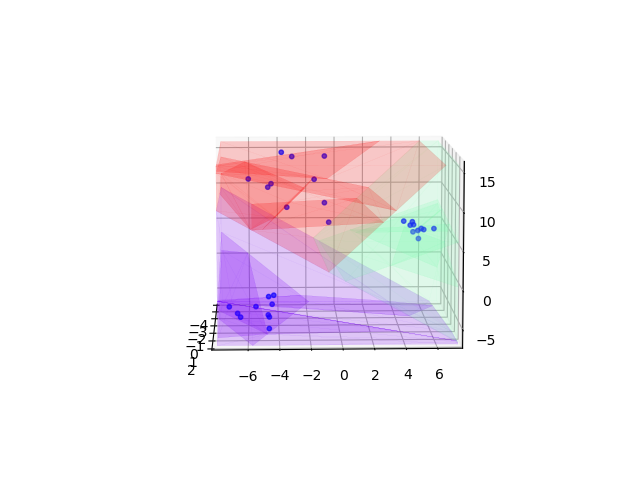

<IPython.core.display.Javascript object>


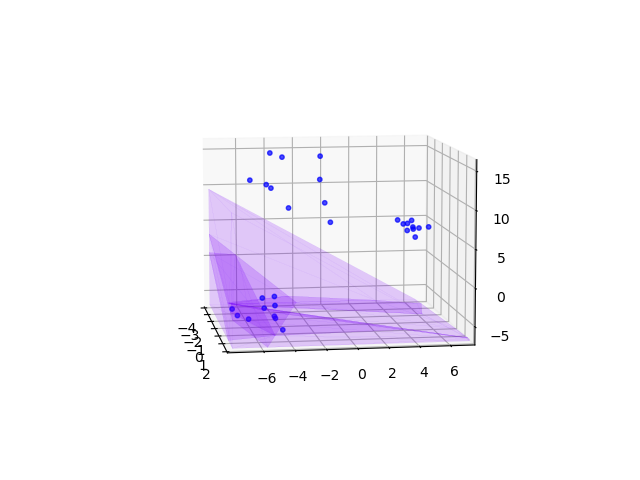

<IPython.core.display.Javascript object>


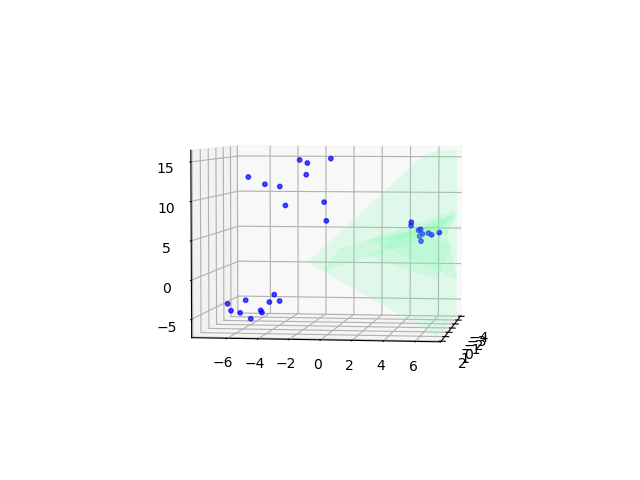

<IPython.core.display.Javascript object>


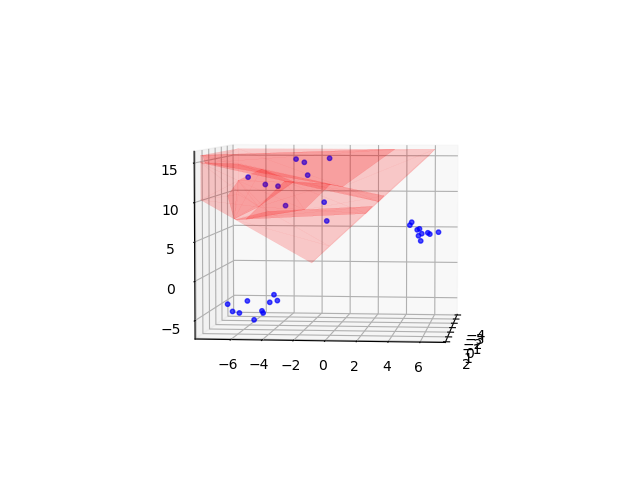

In [15]:
number_of_clusters = 3
Plot.plot3D(data,part_space,merg_space,merg_data,number_of_clusters,False,True)

In [17]:
'''
namefile='example/prova'
starting_namefile_number = 3
Mondrian.save_forest(namefile,starting_namefile_number,data,part_space_list,part_data_list,merg_space_list,merg_data_list,ami_mean,ami_std,ami_tot)

data_read,part_space_list_read,part_data_list_read,merg_space_list_read,merg_data_list_read,ami_mean_read,ami_std_read,ami_tot_read = Mondrian.read_forest(namefile,starting_namefile_number,number_of_iterations)


# data
(data == data_read).all()

# part_space_list
for j in range(len(part_space_list)):
    for i in ['time','father','id_number','leaf','polytope']:
        print((np.array(part_space_list[j][i]) == np.array(part_space_list_read[j][i])).all())

# part_data
for j in range(len(part_data_list)):
    for i in range(len(part_data_list[j])):
        print((part_data_list[j][i] == part_data_list_read[j][i]).all())
        
# merg_space
# problemi con type
for j in range(len(merg_space_list)):
    for i in range(len(merg_space_list[j])):
        print(merg_space_list[j][i].equals(merg_space_list_read[j][i]))
'''

"\nnamefile='example/prova'\nstarting_namefile_number = 3\nMondrian.save_forest(namefile,starting_namefile_number,data,part_space_list,part_data_list,merg_space_list,merg_data_list,ami_mean,ami_std,ami_tot)\n\ndata_read,part_space_list_read,part_data_list_read,merg_space_list_read,merg_data_list_read,ami_mean_read,ami_std_read,ami_tot_read = Mondrian.read_forest(namefile,starting_namefile_number,number_of_iterations)\n\n\n# data\n(data == data_read).all()\n\n# part_space_list\nfor j in range(len(part_space_list)):\n    for i in ['time','father','id_number','leaf','polytope']:\n        print((np.array(part_space_list[j][i]) == np.array(part_space_list_read[j][i])).all())\n\n# part_data\nfor j in range(len(part_data_list)):\n    for i in range(len(part_data_list[j])):\n        print((part_data_list[j][i] == part_data_list_read[j][i]).all())\n        \n# merg_space\n# problemi con type\nfor j in range(len(merg_space_list)):\n    for i in range(len(merg_space_list[j])):\n        print(merg